# Machine Learning - HW1 - Part 5

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Faunction Definitions

In [2]:
def normal(mu, var, x):
    return np.exp( -(x-mu)**2 / (2*var) ) / (np.sqrt(2*np.pi*var))

In [3]:
def draw_confusion_matrix(matrix):
    fig, ax = plt.subplots(figsize=(4, 3))
    ax.imshow(matrix, cmap='YlGn')

    ax.set_xticks(np.arange(2), labels=range(2))
    ax.set_yticks(np.arange(2), labels=range(2))

    ax.set_xlabel("prediction")
    ax.set_ylabel("label")

    colors = [['k', 'k'], ['k', 'w']]
    for i in range(2):
        for j in range(2):
            text = ax.text(j, i, matrix[i][j], ha="center", va="center", color=colors[i][j])

    ax.set_title("Confusion Matrix")
    fig.tight_layout()
    plt.show()

### Loading Dataset

In [4]:
data = pd.read_csv('Data/Breast_cancer_data.csv')
data.head(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [5]:
positive = data[data['diagnosis']==1]
negative = data[data['diagnosis']==0]

positive.head(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
19,13.540,14.36,87.46,566.3,0.09779,1
20,13.080,15.71,85.63,520.0,0.10750,1
21,9.504,12.44,60.34,273.9,0.10240,1
37,13.030,18.42,82.61,523.8,0.08983,1
46,8.196,16.84,51.71,201.9,0.08600,1


In [6]:
columns = list(data.columns[0:5])
print(columns)

['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']


## Naive Bayes Classifier

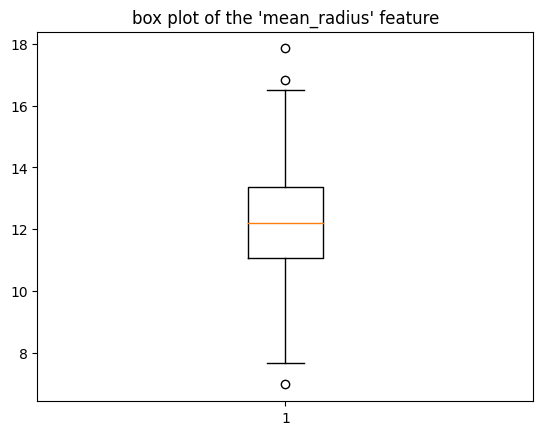

In [7]:
plt.boxplot(positive['mean_radius'])
plt.title("box plot of the 'mean_radius' feature")
plt.show()

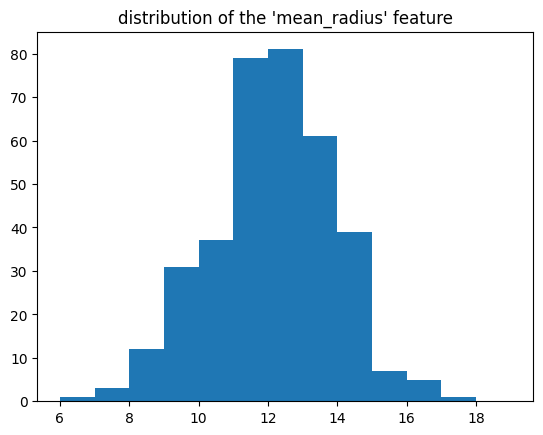

In [8]:
plt.hist(positive['mean_radius'], bins=np.arange(6, 20, 1))
plt.title("distribution of the 'mean_radius' feature")
plt.show()

In [9]:
mu_positive = [None]*5
var_positive = [None]*5

for i in range(5):
    dim_data = positive[columns[i]].to_numpy()
    mu_positive[i] = dim_data.mean()
    var_positive[i] = ((dim_data-mu_positive[i])**2).sum()/(len(dim_data) - 1)

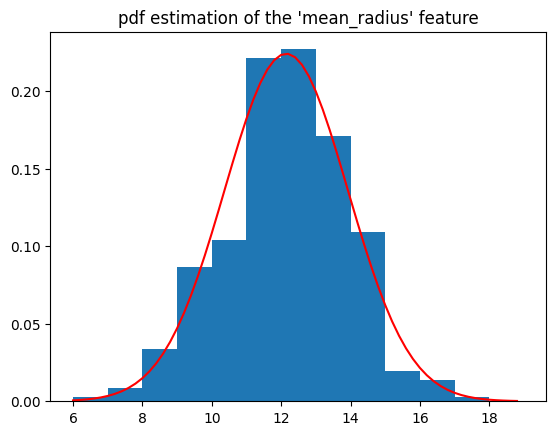

In [10]:
t = np.arange(6, 19, 0.2)
p = normal(mu_positive[0], var_positive[0], t)
plt.hist(positive['mean_radius'], bins=np.arange(6, 20, 1), density=True)
plt.plot(t, p, color='r')
plt.title("pdf estimation of the 'mean_radius' feature")
plt.show()

In [11]:
mu_negative = [None]*5
var_negative = [None]*5

for i in range(5):
    dim_data = negative[columns[i]].to_numpy()
    mu_negative[i] = dim_data.mean()
    var_negative[i] = ((dim_data-mu_negative[i])**2).sum()/(len(dim_data) - 1)

In [12]:
p_positive = positive.shape[0] / data.shape[0]
p_negative = negative.shape[0] / data.shape[0]

print("p_positive: {:.3}".format(p_positive))
print("p_negative: {:.3}".format(p_negative))

p_positive: 0.627
p_negative: 0.373


In [13]:
def classifier(x):
    p_positive_if_x = 1
    p_negative_if_x = 1
    for i in range(5):
        p_positive_if_x *= normal(mu_positive[i], var_positive[i], x[i])
        p_negative_if_x *= normal(mu_negative[i], var_negative[i], x[i])
    
    if p_positive_if_x*p_positive > p_negative_if_x*p_negative:
        return 1

    return 0

In [14]:
yp = [None]*data.shape[0]

true_positive = 0
true_negative = 0

for i in range(data.shape[0]):
    x = data.loc[i].to_list()
    prediction = classifier(x[:5])
    label = int(x[5])
    yp[i] = prediction

    if label == 1 and prediction == 1:
        true_positive += 1
    elif label == 0 and prediction == 0:
        true_negative += 1

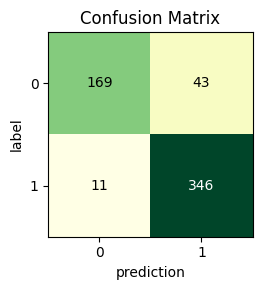

In [15]:
false_positive = negative.shape[0] - true_negative
false_negative = positive.shape[0] - true_positive

nb_confusion_matrix = np.array([[true_negative, false_positive], [false_negative, true_positive]])
draw_confusion_matrix(nb_confusion_matrix)

In [16]:
nb_accuracy = (true_positive + true_negative) / (data.shape[0])
nb_precision = true_positive / (true_positive + false_positive)
nb_recall = true_positive / (true_positive + false_negative)

print("accuracy  : {:.1f}%".format(nb_accuracy*100))
print("precision : {:.1f}%".format(nb_precision*100))
print("recall    : {:.1f}%".format(nb_recall*100))

accuracy  : 90.5%
precision : 88.9%
recall    : 96.9%


## Naive Bayes Classifier using Library

In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

x = data.drop(labels=['diagnosis'], axis=1).to_numpy()
y = data['diagnosis'].to_numpy()

gnb = gnb.fit(x, y)
y_pred = gnb.predict(x)

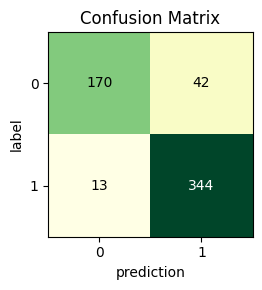

In [18]:
from sklearn import metrics
draw_confusion_matrix(metrics.confusion_matrix(y, y_pred))

In [19]:
print("accuracy  : {:.1f}%".format(metrics.accuracy_score(y, y_pred)*100))
print("precision : {:.1f}%".format(metrics.precision_score(y, y_pred)*100))
print("recall    : {:.1f}%".format(metrics.recall_score(y, y_pred)*100))

accuracy  : 90.3%
precision : 89.1%
recall    : 96.4%


## Optimal Bayes Classifier

In [20]:
x_positive = positive.drop(labels=['diagnosis'], axis=1).to_numpy().reshape(positive.shape[0], 5)
x_negative = negative.drop(labels=['diagnosis'], axis=1).to_numpy().reshape(negative.shape[0], 5)

In [21]:
cov_positive = np.dot(
    (x_positive - mu_positive).transpose(), x_positive - mu_positive)

cov_positive = cov_positive / positive.shape[0]

In [22]:
cov_negative = np.dot(
    (x_negative - mu_negative).transpose(), x_negative - mu_negative)

cov_negative = cov_negative / negative.shape[0]

In [23]:
from scipy.stats import multivariate_normal as mnormal

def bayes_classifier(x):
    p_positive_if_x = mnormal.pdf(x, mu_positive, cov_positive)
    p_negative_if_x = mnormal.pdf(x, mu_negative, cov_negative)
    
    if p_positive_if_x*p_positive > p_negative_if_x*p_negative:
        return 1

    return 0

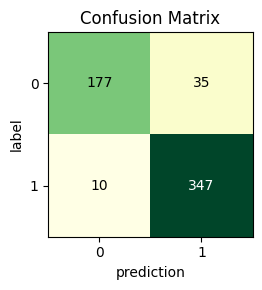

In [24]:
yp_bayesian = [None]*data.shape[0]

for i in range(data.shape[0]):
    x = data.loc[i].to_numpy()
    prediction = bayes_classifier(x[:5])
    yp_bayesian[i] = prediction

b_confusion_matrix = metrics.confusion_matrix(y, yp_bayesian)
draw_confusion_matrix(b_confusion_matrix)

In [25]:
b_accuracy = metrics.accuracy_score(y, yp_bayesian)
b_precision = metrics.precision_score(y, yp_bayesian)
b_recall = metrics.recall_score(y, yp_bayesian)

print("accuracy  : {:.1f}%".format(b_accuracy*100))
print("precision : {:.1f}%".format(b_precision*100))
print("recall    : {:.1f}%".format(b_recall*100))

accuracy  : 92.1%
precision : 90.8%
recall    : 97.2%


## Naive Bayes vs Optimal Bayes

optimal bayes classifier improvements with respect to the naive bayes classifier:

In [26]:
print("accuracy improvement  : {:.1f}%".format((b_accuracy-nb_accuracy)*100))
print("precision improvement : {:.1f}%".format((b_precision-nb_precision)*100))
print("recall improvement    : {:.1f}%".format((b_recall-nb_recall)*100))

accuracy improvement  : 1.6%
precision improvement : 1.9%
recall improvement    : 0.3%
